### Linear Regression

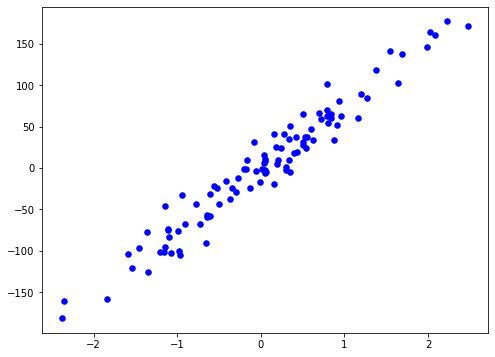

In [1]:
## Load Data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_regression(n_samples = 100,n_features = 1, noise = 20, random_state = 4)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize = (8,6))
plt.scatter(X[:,0],y,color='b',marker = 'o',s = 30)
plt.show()

### Define Linear Regression Class

In [51]:
class LinearRegression:
    def __init__(self,lr = 0.001,n_iteration = 1000):
        self.lr = lr
        self.n_iteration = n_iteration
        self.w = None
        self.b = None
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.b = 0
        self.w = np.zeros(n_features)
        
        
        for _ in range(0,self.n_iteration):
            y_predicted = np.dot(X,self.w)+self.b
            dw = 2*(1/n_samples)*np.dot(X.T,(y_predicted-y))
            self.w = self.w - self.lr*dw
            db = 2*(1/n_samples)*np.sum(y_predicted-y)
            self.b = self.b - self.lr*db
        return self.w,self.b
            
    def predict(self,X):
        return np.dot(X,self.w)+self.b
        
        

### Plot prediction line

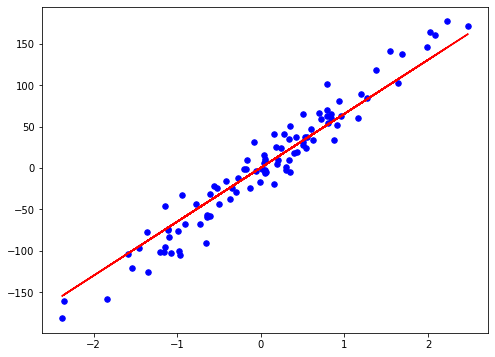

In [52]:
my_lg = LinearRegression()
w,b = my_lg.fit(X_train,y_train)
y_predicted = my_lg.predict(X_test)
fig = plt.figure(figsize = (8,6))
plt.scatter(X[:,0],y,color='b',marker = 'o',s = 30)
plt.plot(X_train[:,0],X_train[:,0]*w+b,color='r')
plt.show()


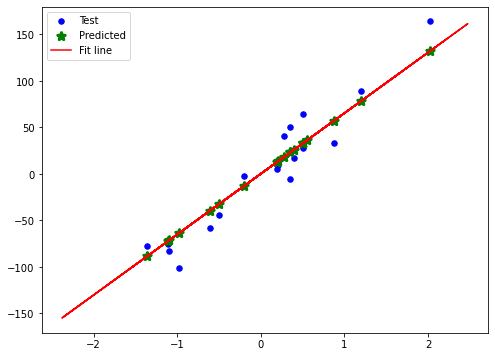

In [66]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X_test[:,0],y_test,color='b',marker = 'o',s = 30)
plt.scatter(X_test[:,0],y_predicted,color='g',marker = '*',s = 60,linewidth = 3)
plt.plot(X_train[:,0],X_train[:,0]*w+b,color='r')
plt.legend(['Test','Predicted','Fit line'])
plt.show()
